In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [11]:
model = YOLO("/kaggle/input/best_detector/pytorch/best.pt/1/best.pt")

img = cv2.imread("/kaggle/input/shelf-imgs/563_2001246084_AddVisibilityImg-20240412_121312.jpg")
results = model.predict(img, show = False)
boxes = results[0].boxes.xyxy.cpu().tolist()
clss = results[0].boxes.cls.cpu().tolist()

# print(boxes)
# print(classes)
# if boxes is not None:
#     for box, cls in zip(boxes, clss):
#         idx += 1

#         crop_obj = im0[int(box[1]) : int(box[3]), int(box[0]) : int(box[2])]

#         cv2.imwrite(os.path.join(crop_dir_name, img_name + str(idx) + ".png"), crop_obj)


0: 384x640 161 objects, 359.1ms
Speed: 2.8ms preprocess, 359.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


1


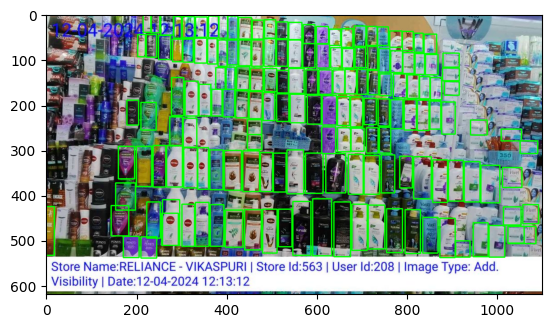

In [57]:
def draw_bounding_boxes(img, results):
    # Extract bounding boxes, classes, names, and confidences
    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    names = results[0].names
    confidences = results[0].boxes.conf.tolist()
    print(len(results))
    # Iterate through the results
    for box, cls, conf in zip(boxes, classes, confidences):
        x_min, y_min, x_max, y_max = box
#         print(box)
        confidence = conf
        name = names[int(cls)]
        
        
        # Draw rectangle on the image
        img = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        # Optionally, put class_id text
        #image = cv2.putText(image, str(name) + ' ' + str(confidence),(int(x_min), int(y_min - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # image = cv2.flip(image, 1)
    # Display the image

    
# results = model(img)
marked_img = orig_img.copy()
draw_bounding_boxes(marked_img, results)
plt.imshow(marked_img)

In [77]:
import math
def neighbors(i, boxes, img_dir, show = False):
    x_i, y_i, w_i, h_i = boxes[i]
    neighbor_img = cv2.imread(img_dir)
    neighbors = []
    for box in boxes:
        x, y, w, h = box
        dist = np.linalg.norm(np.array([x_i, y_i]) - np.array([x, y]))
        if dist <= math.sqrt(2) * max(w_i, h_i):
            neighbors.append(box)
    if show:
        for box in neighbors:
            x, y, w, h = box
            x_min = x - w/2
            y_min = y - h/2
            x_max = x + w/2
            y_max = y + h/2
            # Draw rectangle on the image
            neighbor_img = cv2.rectangle(neighbor_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        x_min = x_i - w_i/2
        y_min = y_i - h_i/2
        x_max = x_i + w_i/2
        y_max = y_i + h_i/2
        neighbor_img = cv2.rectangle(neighbor_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
        plt.imshow(neighbor_img)
    return neighbors

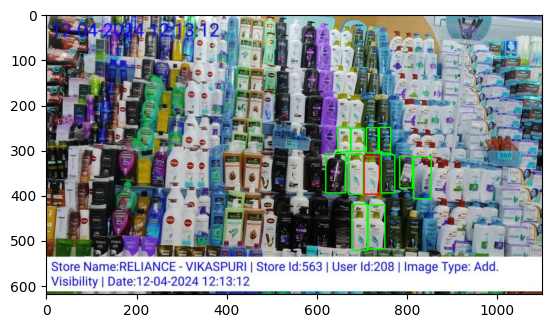

In [82]:
neighbors_0 = neighbors(4, boxes, "/kaggle/input/shelf-imgs/563_2001246084_AddVisibilityImg-20240412_121312.jpg", True)

In [29]:
boxes = results[0].boxes.xywh.tolist()
neighbors_0 = neighbors(0, boxes)

In [31]:
neighbors_0

[[434.453369140625, 199.51577758789062, 27.67572021484375, 60.09513854980469],
 [464.7305908203125, 201.5565643310547, 28.5540771484375, 60.832733154296875],
 [405.60699462890625,
  196.93783569335938,
  25.229095458984375,
  60.32383728027344],
 [436.66961669921875,
  141.76718139648438,
  28.930572509765625,
  51.17877960205078],
 [379.350830078125, 196.0128631591797, 23.138214111328125, 58.487091064453125],
 [462.60919189453125,
  250.1676025390625,
  32.017608642578125,
  33.37605285644531]]

In [44]:
orig_img = cv2.imread("/kaggle/input/shelf-imgs/563_2001246084_AddVisibilityImg-20240412_121312.jpg")
neighbor_img = orig_img.copy() 

In [45]:
for box in neighbors_0:
    x, y, w, h = box
    x_min = x - w/2
    y_min = y - h/2
    x_max = x + w/2
    y_max = y + h/2
    # Draw rectangle on the image
    image = cv2.rectangle(neighbor_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

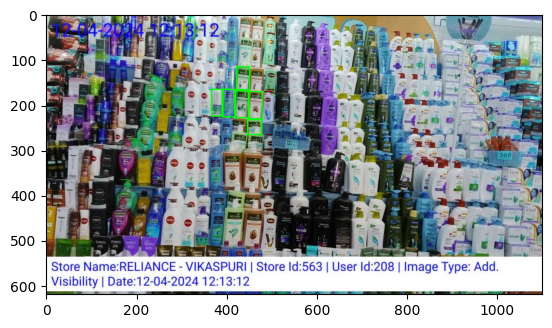

In [46]:
plt.imshow(neighbor_img, vmin = 0, vmax = 255)

In [ ]:
def